In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2.2
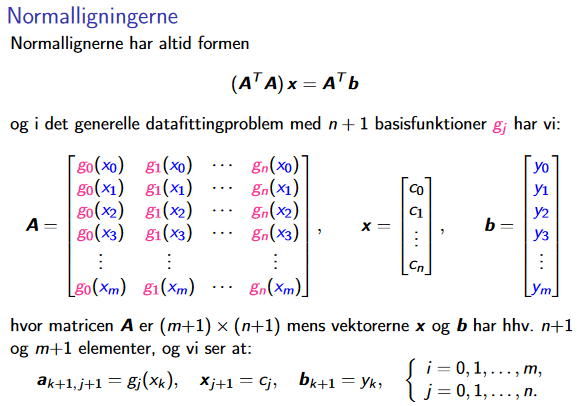

In [3]:
omega = 2*np.pi/365
def Fc(x,c):
    return c[0]+c[1]*np.sin(omega*x)+c[2]*np.cos(omega*x)

def F(x):
    return [1,np.sin(omega*x),np.cos(omega*x)]

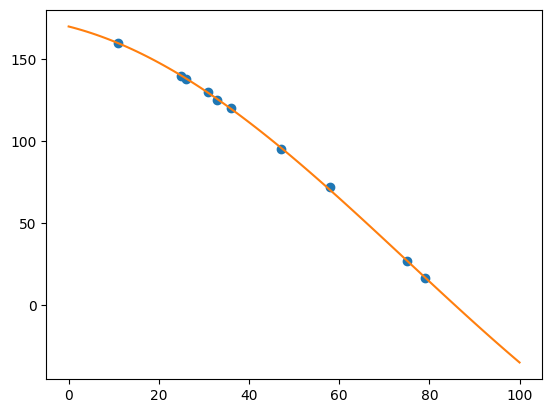

In [10]:
x = [11,25,26,31,33,36,47,58,75,79]
y = [160,140,138,130,125,120,95,72,27,17]

A = np.array(list(map(F,x)))
c = np.linalg.solve(A.T@A, A.T@y)

plt.plot(x,y,'o')
plt.plot(np.linspace(0,100,100),list(map(lambda x: Fc(x,c),np.linspace(0,100,100))))
plt.show()

In [17]:
sunrises = []
for i in range(365-80):
    step = 80+i
    sunrises.append(Fc(step,c))
minimum = min(sunrises)
print(sunrises.index(minimum)+80)

166


## 3.1
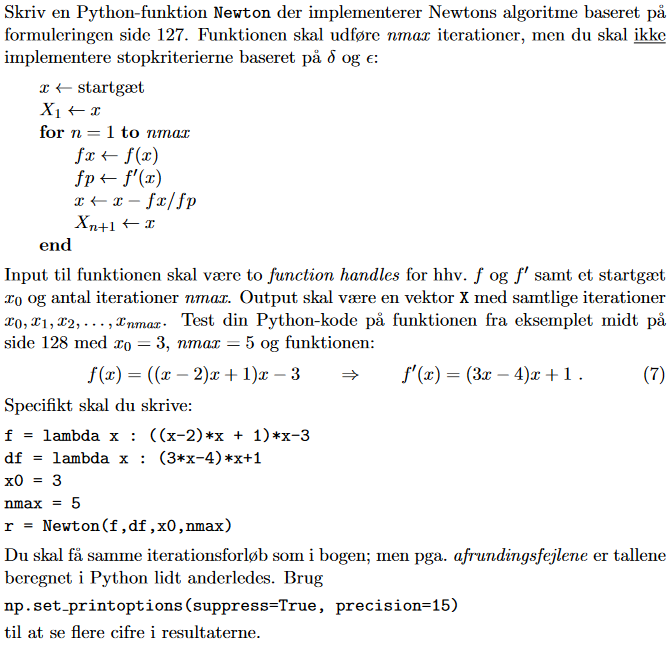

In [30]:
def Neewton(f,df,x0, nmax):
    x = x0
    X = [x]
    for i in range(nmax):
        fx = f(x)
        fp = df(x)
        x = x - fx/fp
        X.append(x)
    return X

In [31]:
f = lambda x : ((x-2)*x+1)*x-3
df = lambda x : (3*x-4)*x+1

In [35]:
print(Neewton(f,df,3,5))
np.set_printoptions(suppress=True,precision=15)
print(Neewton(f,df,3,5))

[3, 2.4375, 2.2130327163151096, 2.175554938721488, 2.174560100666446, 2.1745594102933126]
[3, 2.4375, 2.2130327163151096, 2.175554938721488, 2.174560100666446, 2.1745594102933126]


## 3.2
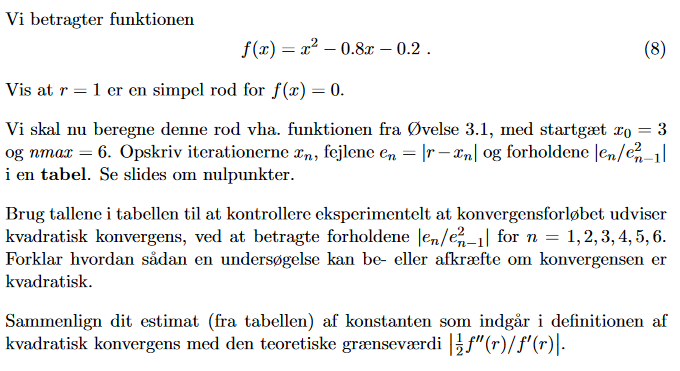

In [37]:
f = lambda x : x**2-0.8*x-0.2
df = lambda x : 2*x-0.8
r = 1
x0 = 3
nmax = 6

In [39]:
nul = Neewton(f,df,x0,nmax)

In [43]:
en = np.abs(np.ones(len(nul))-nul)

In [57]:
forhold = en[1:]/en[:-1]**2
forhold = np.insert(forhold,0,0)

In [62]:
print(np.vstack((en,forhold)).T)

[[2.                0.               ]
 [0.769230769230769 0.192307692307692]
 [0.216076058772688 0.365168539325843]
 [0.028605705726102 0.612687989832661]
 [0.000650874143071 0.795411170222321]
 [0.000000352648409 0.832430321661029]
 [0.000000000000104 0.83382180499167 ]]


In [63]:
forhold = forhold[1:]

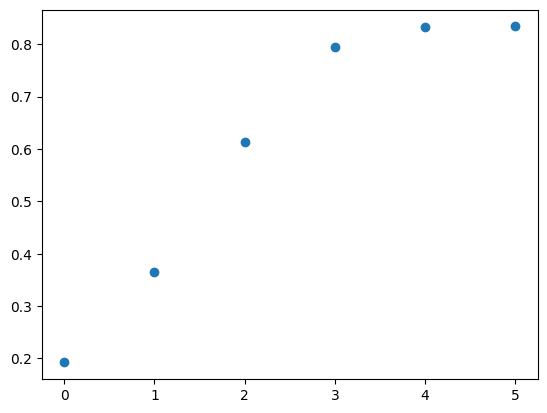

In [75]:
# use forhold to show that the convergence is quadratic
plt.plot(forhold,'o')
# Well its logarithmic??